In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.affine1 = nn.Linear(20, 30)
        self.affine2 = nn.Linear(30, 40)
        self.affine3 = nn.Linear(40, 50)

    def forward(self, x):
        x = F.relu(self.affine1(x))
        x = F.relu(self.affine2(x))
        x = self.affine3(x)
        return x

model = Net()
tobe = """\
Net(
  (affine1): Linear(in_features=20, out_features=30, bias=True)
  (affine2): Linear(in_features=30, out_features=40, bias=True)
  (affine3): Linear(in_features=40, out_features=50, bias=True)
)"""
assert repr(model) == tobe

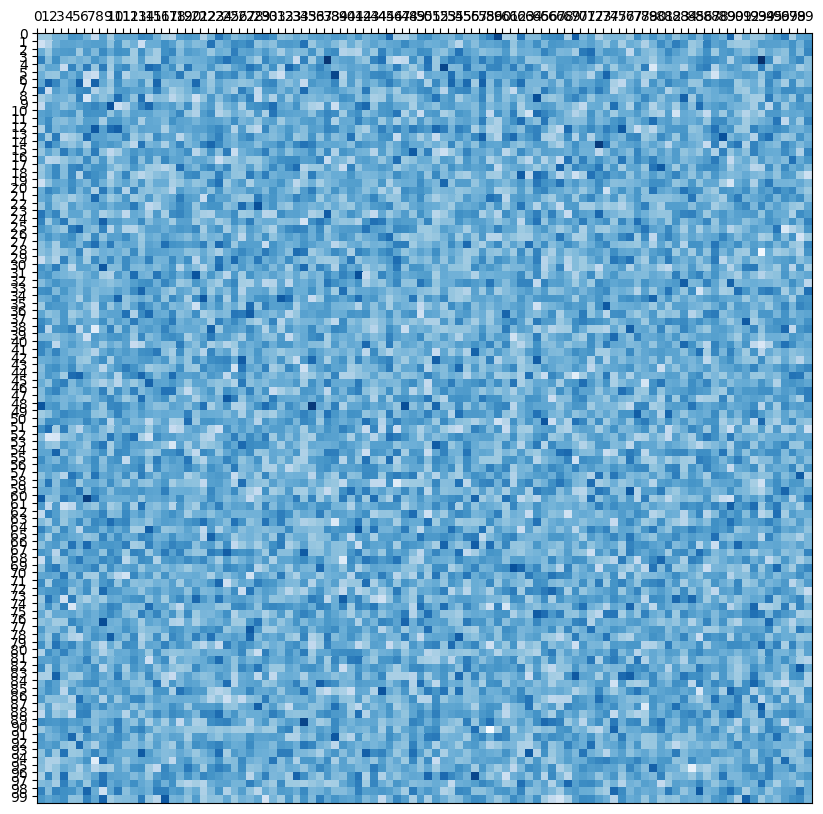

<Figure size 640x480 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
import numpy as np
# seed
torch.manual_seed(0)
data = torch.randn(100, 100)
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)
# font size
fig.set_size_inches(10, 10)
# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0]), minor=False)
ax.set_yticks(np.arange(data.shape[1]), minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticklabels(np.arange(data.shape[0]), minor=False)
ax.set_yticklabels(np.arange(data.shape[1]), minor=False)
plt.show()
plt.savefig('../data/examples/graphs/test5.svg')

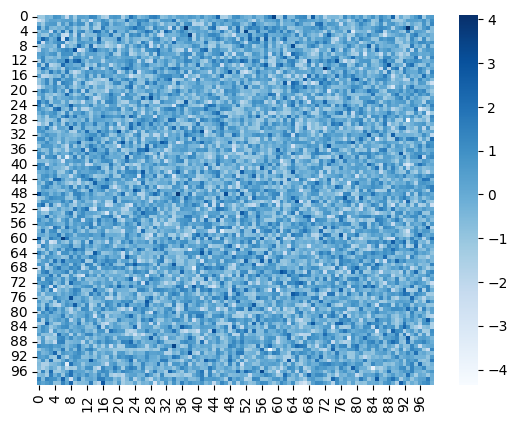

<Figure size 640x480 with 0 Axes>

In [24]:
import seaborn.matrix as sns
sns.heatmap(data, cmap=plt.cm.Blues)
plt.show()
plt.savefig('../data/examples/graphs/test6.svg')

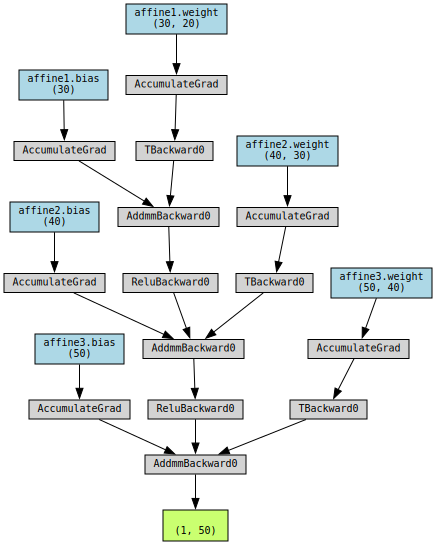

'../data/examples/graphs/test7.svg'

In [47]:
from torchviz import make_dot
x = torch.randn(1, 20)
y = model(x)
assert y.shape == (1, 50)
display(make_dot(y, params=dict(model.named_parameters())))
make_dot(y, params=dict(model.named_parameters())).save('../data/examples/graphs/test7.svg')
